# Landmarks vertices based

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from glob import glob
%matplotlib inline

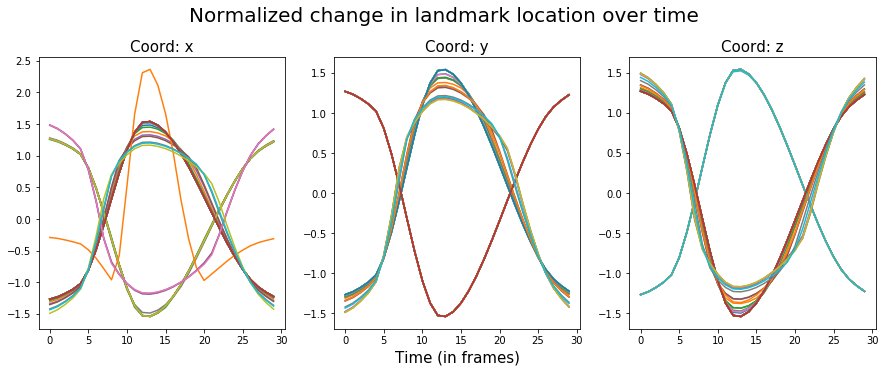

In [67]:
files = sorted(glob('../../FEED_stimulus_frames/id-1260_AU1-100_AU16Open-100_AU2-33/*/*/*landmarks.mat'))
lms = np.zeros((30, 50, 3))
for i, lm in enumerate(files):
    lms[i, :, :] = loadmat(lm)['landmarks']

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
for i, ax in enumerate(axes):
    lms_x = (lms[:, :, i] - lms[:, :, i].mean(axis=0, keepdims=True)) / lms[:, :, i].std(axis=0, keepdims=True)
    ax.plot(lms_x)
    ax.set_title(f"Coord: {['x', 'y', 'z'][i]}", fontsize=15)
    if i == 1:
        ax.set_xlabel("Time (in frames)", fontsize=15)
fig.suptitle('Normalized change in landmark location over time', fontsize=20, y=1.02)
fig.show()

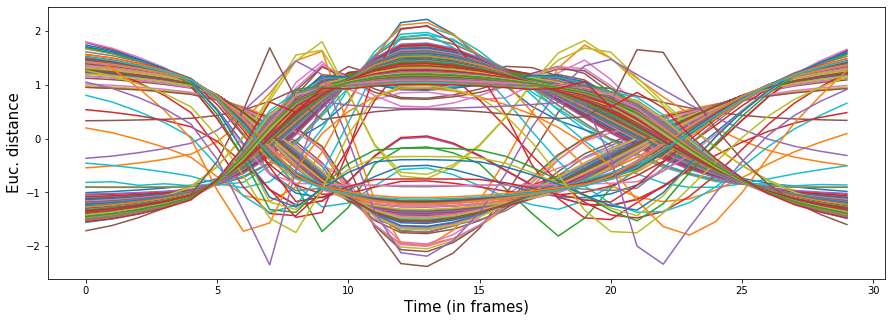

In [88]:
distances = np.zeros((30, int(50*49/2)))
for i in range(30):
    tmp = pairwise_distances(lms[i, :, :])
    distances[i, :] = tmp[np.tril_indices_from(tmp, k=-1)]

distances = (distances - distances.mean(axis=0)) / distances.std(axis=0)
plt.figure(figsize=(15, 5))
plt.xlabel('Time (in frames)', fontsize=15)
plt.ylabel('Euc. distance', fontsize=15)
plt.plot(distances);

In [72]:
from sklearn.metrics import pairwise_distances


(50, 50)

In [101]:
arr = np.r_[
    [[1, 1, 1],
    [2, 2, 2],
    [4, 4, 4],
    [8, 8, 8]]
]
dist = pairwise_distances(arr)
print(dist)
dist = dist[np.triu_indices_from(dist, k=1)]
dist

[[ 0.          1.73205081  5.19615242 12.12435565]
 [ 1.73205081  0.          3.46410162 10.39230485]
 [ 5.19615242  3.46410162  0.          6.92820323]
 [12.12435565 10.39230485  6.92820323  0.        ]]


array([ 1.73205081,  5.19615242, 12.12435565,  3.46410162, 10.39230485,
        6.92820323])

In [107]:
def get_names_distances(n=4):
    names = [f'{s1}-{s2}' for s1, s2 in list(itertools.combinations(range(1, n+1), 2))]
    return names

get_names_distances(n=4)

['1-2', '1-3', '1-4', '2-3', '2-4', '3-4']